In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [17]:
nii_img = nib.load('../data/data_mask/mask_546.nii')
img_data = nii_img.get_fdata()

In [18]:
slice_index = img_data.shape[2] // 2 
slice_data = img_data[:, :, slice_index]

In [19]:
_, binary_image = cv2.threshold(slice_data, np.mean(slice_data), 255, cv2.THRESH_BINARY)

In [20]:
binary_image = binary_image.astype(np.uint8)
binary_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
def calculate_smoothness(contour):
    # Fit an ellipse to the contour
    if len(contour) < 5:
        return None  # Not enough points to fit an ellipse
    
    ellipse = cv2.fitEllipse(contour)
    (center, axes, orientation) = ellipse
    major_axis_length = max(axes)
    minor_axis_length = min(axes)

    # Smoothness measure: ratio of the minor to major axis
    smoothness = minor_axis_length / major_axis_length
    return smoothness

In [23]:
smoothness_values = []
for contour in contours:
    smoothness = calculate_smoothness(contour)
    if smoothness is not None:
        smoothness_values.append(smoothness)

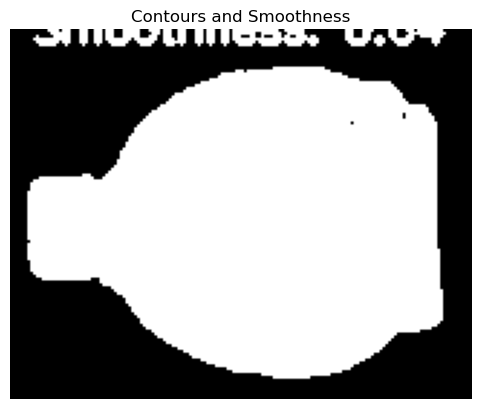

Contour 1 smoothness: 0.64


In [24]:
for i, contour in enumerate(contours):
    cv2.drawContours(binary_image, [contour], -1, (255), 2)  # Draw contours in white
    (x, y, w, h) = cv2.boundingRect(contour)
    if i < len(smoothness_values):
        cv2.putText(binary_image, f'Smoothness: {smoothness_values[i]:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255), 2)

plt.imshow(binary_image, cmap='gray')
plt.title('Contours and Smoothness')
plt.axis('off')
plt.show()

# Output smoothness values
for i, smoothness in enumerate(smoothness_values):
    print(f'Contour {i+1} smoothness: {smoothness:.2f}')

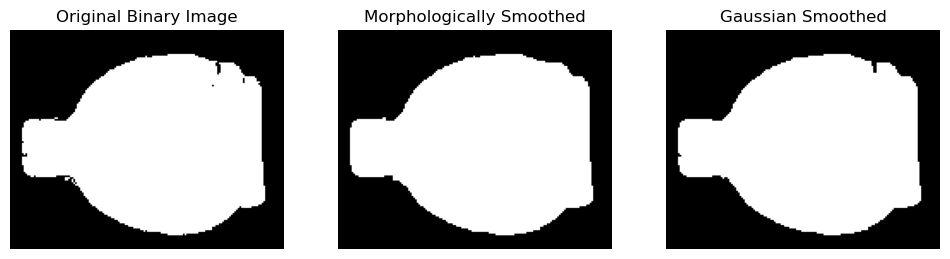

In [25]:
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

nii_img = nib.load('../data/data_mask/mask_546.nii')
img_data = nii_img.get_fdata()

# Select a slice (adjust the index as needed)
slice_index = img_data.shape[2] // 2  # Use the middle slice for example
slice_data = img_data[:, :, slice_index]

# Convert the slice to a binary image
# Adjust the threshold value as needed
_, binary_image = cv2.threshold(slice_data, np.mean(slice_data), 1, cv2.THRESH_BINARY)

# Ensure binary image is in uint8 format
binary_image = binary_image.astype(np.uint8)

# Function to apply morphological smoothing
def morphological_smoothing(binary_image, kernel_size=3, iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    smoothed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    return smoothed_image

# Apply morphological smoothing
smoothed_image = morphological_smoothing(binary_image, kernel_size=3, iterations=1)

# Function to apply Gaussian blur and re-threshold
def gaussian_smoothing(binary_image, sigma=1):
    blurred_image = gaussian_filter(binary_image.astype(float), sigma=sigma)
    _, smoothed_image = cv2.threshold(blurred_image, 0.5, 1, cv2.THRESH_BINARY)
    return smoothed_image.astype(np.uint8)

# Apply Gaussian smoothing
smoothed_image_gaussian = gaussian_smoothing(binary_image, sigma=1)

# Function to selectively smooth certain regions
def selective_smoothing(binary_image, regions_to_protect, kernel_size=3, iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    smoothed_image = binary_image.copy()
    for region in regions_to_protect:
        mask = np.zeros_like(binary_image)
        cv2.drawContours(mask, [region], -1, 1, -1)
        region_smoothed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=iterations)
        smoothed_image = np.where(mask == 1, region_smoothed, smoothed_image)
    return smoothed_image

# Assume you have contours of regions to protect
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Apply selective smoothing
smoothed_image_selective = selective_smoothing(binary_image, contours, kernel_size=3, iterations=1)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Morphologically Smoothed')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Smoothed')
plt.imshow(smoothed_image_gaussian, cmap='gray')
plt.axis('off')

plt.show()


Original Image Metrics:
Perimeter: 475.16
Area: 10681.00
Smoothness: 0.64

Morphologically Smoothed Image Metrics:
Perimeter: 435.56
Area: 10730.00
Smoothness: 0.66

Gaussian Smoothed Image Metrics:
Perimeter: 446.05
Area: 10690.00
Smoothness: 0.65


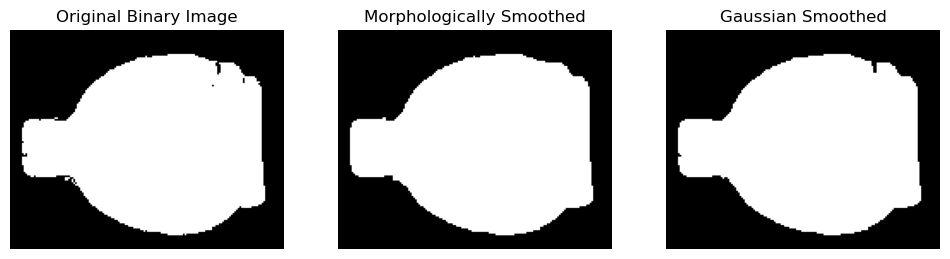

In [26]:
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter


nii_img = nib.load('../data/data_mask/mask_546.nii')
img_data = nii_img.get_fdata()


slice_index = img_data.shape[2] // 2 
slice_data = img_data[:, :, slice_index]

# Convert the slice to a binary image
# Adjust the threshold value as needed
_, binary_image = cv2.threshold(slice_data, np.mean(slice_data), 1, cv2.THRESH_BINARY)
binary_image = binary_image.astype(np.uint8)


def morphological_smoothing(binary_image, kernel_size=3, iterations=1): # Function to apply morphological smoothing
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    smoothed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    return smoothed_image


smoothed_image_morph = morphological_smoothing(binary_image, kernel_size=3, iterations=1) # Apply morphological smoothing

 
def gaussian_smoothing(binary_image, sigma=1): # Function to apply Gaussian blur and re-threshold
    blurred_image = gaussian_filter(binary_image.astype(float), sigma=sigma)
    _, smoothed_image = cv2.threshold(blurred_image, 0.5, 1, cv2.THRESH_BINARY)
    return smoothed_image.astype(np.uint8)


smoothed_image_gaussian = gaussian_smoothing(binary_image, sigma=1) # Apply Gaussian smoothing

# Function to calculate metrics for comparison
def calculate_metrics(binary_image):
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total_perimeter = sum(cv2.arcLength(contour, True) for contour in contours)
    total_area = sum(cv2.contourArea(contour) for contour in contours)

    smoothness_values = []
    for contour in contours:
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            (center, axes, orientation) = ellipse
            major_axis_length = max(axes)
            minor_axis_length = min(axes)
            smoothness = minor_axis_length / major_axis_length
            smoothness_values.append(smoothness)

    average_smoothness = np.mean(smoothness_values) if smoothness_values else 0

    return total_perimeter, total_area, average_smoothness


original_metrics = calculate_metrics(binary_image)
morph_metrics = calculate_metrics(smoothed_image_morph)
gaussian_metrics = calculate_metrics(smoothed_image_gaussian)

print("Original Image Metrics:")
print(f"Perimeter: {original_metrics[0]:.2f}")
print(f"Area: {original_metrics[1]:.2f}")
print(f"Smoothness: {original_metrics[2]:.2f}")

print("\nMorphologically Smoothed Image Metrics:")
print(f"Perimeter: {morph_metrics[0]:.2f}")
print(f"Area: {morph_metrics[1]:.2f}")
print(f"Smoothness: {morph_metrics[2]:.2f}")

print("\nGaussian Smoothed Image Metrics:")
print(f"Perimeter: {gaussian_metrics[0]:.2f}")
print(f"Area: {gaussian_metrics[1]:.2f}")
print(f"Smoothness: {gaussian_metrics[2]:.2f}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Morphologically Smoothed')
plt.imshow(smoothed_image_morph, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gaussian Smoothed')
plt.imshow(smoothed_image_gaussian, cmap='gray')
plt.axis('off')

plt.show()
